In [1]:
from maelzel.core import *
from maelzel import scoring

Chain([4C:1♩, Rest:3♩, Rest:4♩])
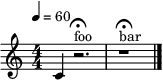

In [4]:
chain = Chain([
    Note("4C", 1),
    Rest(3, label='foo').addSymbol('fermata'),
    Rest(4, label='bar').addSymbol('fermata')
    
])
chain

In [10]:
setScoreStruct()

TypeError: setScoreStruct() missing 1 required positional argument: 's'

In [ ]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1, label='foo').addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1, label='foo').addSymbol('fermata'),
        
])
ch
v = ch.asVoice()
v.stack()
v.show()


In [5]:
struct = ScoreStruct(r'''
3/16, 100
2/16
3/16
4/16
2/16
3/16
5/16
4/16
5/16
6/16
4/16, barline=double
2/16
4/16
3/16
7/16
2/16
4/16
.
5/16
4/16
8/16
4/16, barline=double
3/16
2/16
5/16
6/16
4/16
3/16
4/16
5/16
3/16
6/16
3/16, barline=double
6/16
3/16
4/16
5/16
2/16
3/16
4/16
5/16
8/16
4/16
6/16, barline=double
2/16
3/16
5/16
4/16
3/16
2/16
5/16
2/16
3/16
6/16
2/16, barline=double
3/16
.
.
.
2/16
3/16
4/16
5/16
4/16
8/16
2/16
3/16
4/16
3/16
.
.
4/16
4/16, barline=final
''')

setScoreStruct(struct)

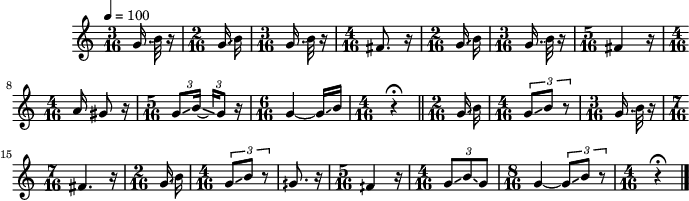

In [9]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1, label='foo').addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1, label='foo').addSymbol('fermata'),
    
    
    
    
    
    
    
    
    
    
    
])
ch
v = ch.asVoice()
v.stack()
v.show()
# v.play()

In [30]:
v.play(sustain=0.05, instr='sin', position=0.5)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=21)
    Synth(𝍪 preset.sin:502.0138, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.225 ...)
    Synth(𝍪 preset.sin:502.0139, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.15 ...)
    Synth(𝍪 preset.sin:502.014, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.225 ...)
    Synth(𝍪 preset.sin:502.0141, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=66 p19=0.515178 p20=0.45 ...)
    Synth(𝍪 preset.sin:502.0142, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.15 ...)
    Synth(𝍪 preset.sin:502.0143, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.225 ...)
    Synth(𝍪 preset.sin:502.0144, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=66 p19=0.515178 p20=0.6 ...)
    Synth(𝍪 preset.sin:502.0145, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=69 p19=0.515178 p20=0.15 ...)
    Synth(𝍪 preset.sin:502.0146, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=68 p19=0.515178 p20=0.3 ...)
    Synth(𝍪 preset.sin:502.0147, p4=0 idataidx_:5=17 inumbps:6=4 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.2 ...)
    Synth(𝍪 preset.sin:502.0148, p4=0 idataidx_:5=17 inumbps:6=4 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.6 ...)
    Synth(𝍪 preset.sin:502.0149, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.15 ...)
    Synth(𝍪 preset.sin:502.015, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.2 ...)
    Synth(𝍪 preset.sin:502.0151, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.225 ...)
    Synth(𝍪 preset.sin:502.0152, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=66 p19=0.515178 p20=0.9 ...)
    Synth(𝍪 preset.sin:502.0153, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.15 ...)
    Synth(𝍪 preset.sin:502.0154, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.

props {'gliss': True}
####### rendering «0.000:0.375 4G gliss properties={'resetEnharmonicSlots': True}»
####### rendering «0.375:0.500 4B»
####### rendering «0.500:0.750 rest»
****** «0.500:0.750 rest» []
####### rendering «0.000:0.500 rest attachments=[Fermata(anchor=None, color='', instancePriority=0, kind='normal')]»
****** «0.000:0.500 rest attachments=[Fermata(anchor=None, color='', instancePriority=0, kind='normal')]» [Fermata(anchor=None, color='', instancePriority=0, kind='normal')]
Found Fermata(anchor=None, color='', instancePriority=0, kind='normal') in a rest
####### rendering «0.000:0.500 rest attachments=[Fermata(anchor=None, color='', instancePriority=0, kind='normal')]»
****** «0.000:0.500 rest attachments=[Fermata(anchor=None, color='', instancePriority=0, kind='normal')]» [Fermata(anchor=None, color='', instancePriority=0, kind='normal')]
Found Fermata(anchor=None, color='', instancePriority=0, kind='normal') in a rest
####### rendering «0.500:0.750 rest»
****** «0.5

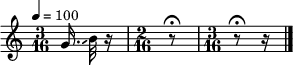

In [3]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    
    Rest(1, label='foo').addSymbol(symbols.Fermata()),
    
])
ch
v = ch.asVoice()
v.stack()
v.show()
# v.play()

In [10]:
r = v.scoringEvents()[-1]
r.clone()

«0.750:1.750 rest attachments=[Text(text=foo, placement=above, fontsize=10.0), Fermata(anchor=None, color='', instancePriority=0, kind='normal')]»

In [5]:
v.itemsBetween(0.75, 1.25)

[4G:0.25♩:gliss=True, 4B:0.25♩]

In [6]:
[struct.locationToBeat(idx) for idx in range(10)]

[0, 0.75, 1.25, 2, 3, 3.5, 4.25, 5.5, 6.5, 7.75]

Chain([4C, 4E:offset=5, 4F:offset=6, 4G:4.5♩])
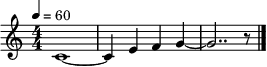

In [11]:
chain = Chain([
    "4C",
    "4E:offset=5",
    "4F:offset=6",
    "4G:4.5"
])
chain

Chain([4C~:0.75♩:offset=0, 4C~:0.5♩:offset=0.75, 4C~:0.75♩:offset=1.25, 4C~:1♩:offset=2, 4C~:0.5♩:offset=3, 4C~:0.75♩:offset=3.5, 4C:0.75♩:offset=4.25, 4E~:0.5♩:offset=5, 4E:0.5♩:offset=5.5, 4F~:0.5♩:offset=6, …])
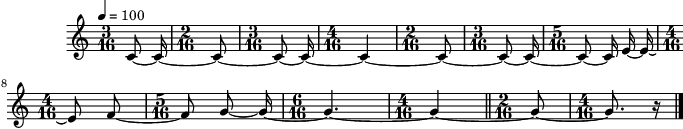

In [19]:
chain.splitEventsAtOffsets([struct.locationToBeat(n) for n in range(30)])
chain

In [21]:
chain.itemsBetween(struct.locationToBeat(6), struct.locationToBeat(7))

[4C:0.75♩:offset=4.25, 4E~:0.5♩:offset=5]

In [20]:
chain.dump()

Chain([4C~:3♩:offset=0, 4C~:2♩:offset=3, 4C:5♩:offset=5:symbols=[Articulation(kind=accent)]])
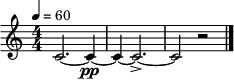

In [8]:
chain = Chain(n.splitAtOffsets([3, 5]))
chain[1].dynamic = 'pp'
chain[2].addSymbol('articulation', '>')
chain
